<a href="https://colab.research.google.com/github/Rjritik12/COGITATE_TASKS/blob/main/cogitate3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [63]:



def get_specs(soup):
  try:
    specs_table = soup.find("span", attrs= {"class":'selection'})
    specs = specs_table.text.strip()
  except AttributeError:
    specs = ""
  return specs


def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})

        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={ 'class':'a-offscreen'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'class':'a-offscreen'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("span", attrs={'class':'a-size-medium a-color-base'}).string.strip()

    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-size-base a-color-base'}).string.strip()
        except:
            rating = ""

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"

    return available

In [64]:
if __name__ == '__main__':
    # Add your user agent
    HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=laptop&ref=nb_sb_noss"

    # Initialize an empty dictionary to store data
    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[], "specifications":[]}

    # Initialize a variable to keep track of pages
    page = 1

    while len(d["title"]) < 1500:
        # HTTP Request
        webpage = requests.get(URL, headers=HEADERS)

        # Soup Object containing all data
        soup = BeautifulSoup(webpage.content, "html.parser")

        # Fetch links as List of Tag Objects
        links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

        # Store the links
        links_list = []

        # Loop for extracting links from Tag Objects
        for link in links:
            links_list.append(link.get('href'))

        # Loop for extracting product details from each link
        for link in links_list:
            new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

            new_soup = BeautifulSoup(new_webpage.content, "html.parser")

            # Function calls to display all necessary product information
            d['title'].append(get_title(new_soup))
            d['price'].append(get_price(new_soup))
            d['rating'].append(get_rating(new_soup))
            d['reviews'].append(get_review_count(new_soup))
            d['availability'].append(get_availability(new_soup))
            d['specifications'].append(get_specs(new_soup))

        # Check if there is a next page
        next_page = soup.find("a", attrs={'class':'s-pagination-next'})

        # If there is a next page, update the URL
        if next_page:
            URL = "https://www.amazon.com" + next_page.get('href')
        else:
            break

        page += 1

    # Create a Pandas DataFrame
    amazon_df = pd.DataFrame.from_dict(d)

    # Remove rows with empty title
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])

    # Save the DataFrame to a CSV file
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [59]:
amazon_df

,title,price,rating,reviews,availability,specifications


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [47]:
amazon_df = pd.read_csv("amazon_data.csv")

In [48]:
# Assuming amazon_df is already loaded
amazon_df['price'] = amazon_df['price'].str.replace('Page 1 of 1', '', regex=True) # Remove the problematic string
amazon_df['price'] = pd.to_numeric(amazon_df['price'].str.replace('[$,]', '', regex=True), errors='coerce') # Convert to numeric, handling errors

In [ ]:
print(amazon_df.describe())

       price
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN


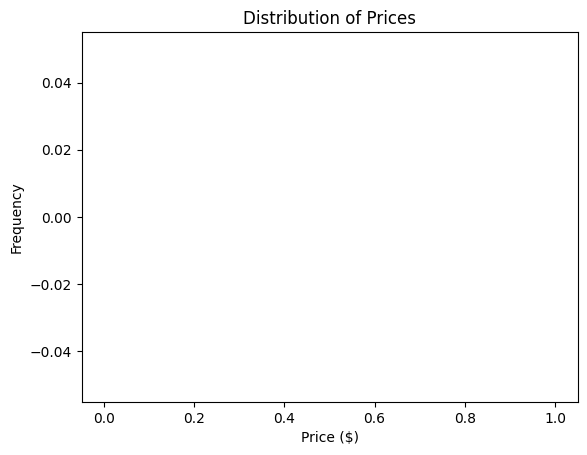

In [ ]:
plt.hist(amazon_df['price'], bins=50)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [49]:
rating_counts = amazon_df['rating'].value_counts().head(10)
print(rating_counts)

Series([], Name: count, dtype: int64)


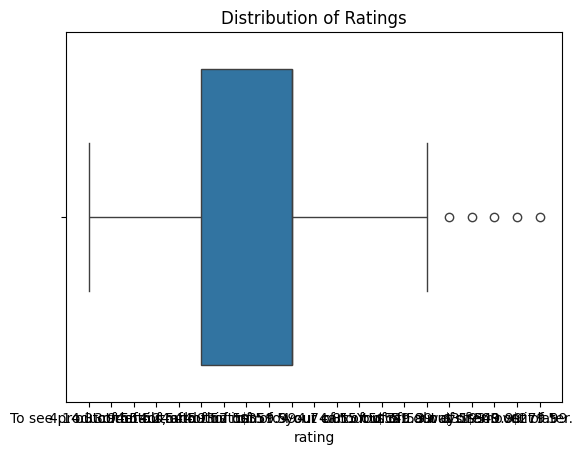

In [ ]:
sns.boxplot(x=amazon_df['rating'])
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
availability_counts = amazon_df['availability'].value_counts().head(10)
print(availability_counts)

availability
Not Available                          81
In Stock                               35
Only 1 left in stock - order soon.      4
Only 6 left in stock - order soon.      2
Only 7 left in stock - order soon.      2
Only 15 left in stock - order soon.     2
In stock                                2
Only 3 left in stock - order soon.      2
Only 14 left in stock - order soon.     2
Only 20 left in stock - order soon.     2
Name: count, dtype: int64
